# IS 362 – Week 8 Assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Here below is the website where the files for the data originated.

Source Code: https://archive.ics.uci.edu/dataset/9/auto+mpg

## Reading and Importing the Files

These blocks of code here are used to view the files and read what is in them. The one below is to view the data in a DataFrame. The **'header=None'** statement avoids making the first row the header in the file.

In [2]:
open('auto-mpg.data', 'r').readlines()

['18.0   8   307.0      130.0      3504.      12.0   70  1\t"chevrolet chevelle malibu"\n',
 '15.0   8   350.0      165.0      3693.      11.5   70  1\t"buick skylark 320"\n',
 '18.0   8   318.0      150.0      3436.      11.0   70  1\t"plymouth satellite"\n',
 '16.0   8   304.0      150.0      3433.      12.0   70  1\t"amc rebel sst"\n',
 '17.0   8   302.0      140.0      3449.      10.5   70  1\t"ford torino"\n',
 '15.0   8   429.0      198.0      4341.      10.0   70  1\t"ford galaxie 500"\n',
 '14.0   8   454.0      220.0      4354.       9.0   70  1\t"chevrolet impala"\n',
 '14.0   8   440.0      215.0      4312.       8.5   70  1\t"plymouth fury iii"\n',
 '14.0   8   455.0      225.0      4425.      10.0   70  1\t"pontiac catalina"\n',
 '15.0   8   390.0      190.0      3850.       8.5   70  1\t"amc ambassador dpl"\n',
 '15.0   8   383.0      170.0      3563.      10.0   70  1\t"dodge challenger se"\n',
 '14.0   8   340.0      160.0      3609.       8.0   70  1\t"plymouth \'cuda 

This code block is done to read the description file about the database. Here, on "Attribute Information", the names for the columns can be viewed.

In [3]:
names = open('auto-mpg.names', 'r')
names.readlines()

['1. Title: Auto-Mpg Data\n',
 '\n',
 '2. Sources:\n',
 '   (a) Origin:  This dataset was taken from the StatLib library which is\n',
 '                maintained at Carnegie Mellon University. The dataset was \n',
 '                used in the 1983 American Statistical Association Exposition.\n',
 '   (c) Date: July 7, 1993\n',
 '\n',
 '3. Past Usage:\n',
 '    -  See 2b (above)\n',
 '    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.\n',
 '       In Proceedings on the Tenth International Conference of Machine \n',
 '       Learning, 236-243, University of Massachusetts, Amherst. Morgan\n',
 '       Kaufmann.\n',
 '\n',
 '4. Relevant Information:\n',
 '\n',
 '   This dataset is a slightly modified version of the dataset provided in\n',
 '   the StatLib library.  In line with the use by Ross Quinlan (1993) in\n',
 '   predicting the attribute "mpg", 8 of the original instances were removed \n',
 '   because they had unknown values for the "mpg" attribute.  The

In [4]:
automobile = pd.read_fwf('auto-mpg.data', header=None)
automobile

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


### Fixing the DataFrame

The code block below shows the process of adding the column names to the DataFrame.

The block below shows a complete DataFrame with appropriately titled column headers for the classes, while also retaining all of the original data and shifting the original column header row downward to be part of the data. The object "columns" is the proper column headers or series of values in each column, as listed in the ".names" file.

In [5]:
columns = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Vehicle Model']

automobile.columns = columns
automobile

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Vehicle Model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


I soon discovered that the Horsepower values are float values, so I had to convert them to integers.

## Fixing the 'Horsepower' Values

**Prompt**: Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [6]:
automobile[automobile['Horsepower'] == '?']

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Vehicle Model
32,25.0,4,98.0,?,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,?,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,?,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,?,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,?,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,?,3035.0,20.5,82,1,"""amc concord dl"""


When replacing the '?' with None in an attempt to get null values, the '?' values in Horsepower are randomized to reasonable values in comparison with the rest of the data. 

However, using **np.nan** will give me the null values as intended.

The cell below replaces them and checks for the Horsepower values in some of the rows.

In [7]:
automobile.replace('?', np.nan, inplace=True) # The 'inplace=True' statement locks in the changes
print(automobile.loc[32])
print(automobile.loc[126])

MPG                      25.0
Cylinders                   4
Displacement             98.0
Horsepower                NaN
Weight                 2046.0
Acceleration             19.0
Model Year                 71
Origin                      1
Vehicle Model    "ford pinto"
Name: 32, dtype: object
MPG                         21.0
Cylinders                      6
Displacement               200.0
Horsepower                   NaN
Weight                    2875.0
Acceleration                17.0
Model Year                    74
Origin                         1
Vehicle Model    "ford maverick"
Name: 126, dtype: object


This checks whether the '?' values have been replaced with null values.

In [8]:
automobile[automobile['Horsepower'].isnull()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Vehicle Model
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,"""amc concord dl"""


Initially, when trying to calculate for the maximum value, I discovered that the '?' values might have converted all of the numbers in the 'Horsepower' column to mixed values, not purely integers. To fix this, I had to use the pd.to_numeric method shown below. Then I had to check if distribution operators would work, along with that column's datatype.

In [9]:
automobile['Horsepower'] = pd.to_numeric(automobile['Horsepower'], downcast='integer', errors='coerce')
# My attempt at turning the values into integers, if the .astype(int) does not work, use this method
print(automobile['Horsepower'].min())
print(automobile['Horsepower'].max())

46.0
230.0


In [10]:
automobile['Horsepower'].dtype

dtype('float64')

After fixing the column's data, I had to then had to replace the null values with the horsepower numbers depending on the car data. Searching for the car's year and model, I then inputted the horsepower value associated with it. Then checked if those rows had their Horsepower values updated.

In [11]:
automobile.loc[32, 'Horsepower'] = 86
automobile.loc[126, 'Horsepower'] = 140
automobile.loc[330, 'Horsepower'] = 51
automobile.loc[336, 'Horsepower'] = 135
automobile.loc[354, 'Horsepower'] = 99
automobile.loc[374, 'Horsepower'] = 82

print(automobile.iloc[32])
print(automobile.iloc[126])
print(automobile.iloc[330])
print(automobile.iloc[336])
print(automobile.iloc[354])
print(automobile.iloc[374])

MPG                      25.0
Cylinders                   4
Displacement             98.0
Horsepower               86.0
Weight                 2046.0
Acceleration             19.0
Model Year                 71
Origin                      1
Vehicle Model    "ford pinto"
Name: 32, dtype: object
MPG                         21.0
Cylinders                      6
Displacement               200.0
Horsepower                 140.0
Weight                    2875.0
Acceleration                17.0
Model Year                    74
Origin                         1
Vehicle Model    "ford maverick"
Name: 126, dtype: object
MPG                                40.9
Cylinders                             4
Displacement                       85.0
Horsepower                         51.0
Weight                           1835.0
Acceleration                       17.3
Model Year                           80
Origin                                2
Vehicle Model    "renault lecar deluxe"
Name: 330, dtype: object

In [12]:
automobile['Horsepower'].isnull().value_counts()

False    398
Name: Horsepower, dtype: int64

In [13]:
automobile.isnull().value_counts()

MPG    Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  Origin  Vehicle Model
False  False      False         False       False   False         False       False   False            398
dtype: int64

Sure enough, there are no null values in the column or entire the DataFrame.

## Fixing the 'Origin' Values

The code block below has a function that respectively replaces/converts the 'Origin' class values from '1','2','3' to 'USA', 'Asia', 'Europe.'

In [14]:
automobile['Origin'].replace([1, 2, 3], ['USA', 'Asia', 'Europe'], inplace=True)
automobile

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Vehicle Model
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,"""ford ranger"""


This next code block was done out of curiosity, it's largely irrelevant to the assignment. So it can be ignored.

In [15]:
automobile['Origin'].value_counts()

USA       249
Europe     79
Asia       70
Name: Origin, dtype: int64

## DIstribution for Cylinders

In [16]:
cylinder = automobile['Cylinders'].value_counts()
cylinder_count = pd.DataFrame(cylinder)
cylinder_count

,Cylinders
4,204
8,103
6,84
3,4
5,3


<AxesSubplot:title={'center':'Number of Cylinders in a Vehicle'}, xlabel='Cylinders', ylabel='Vehicles'>

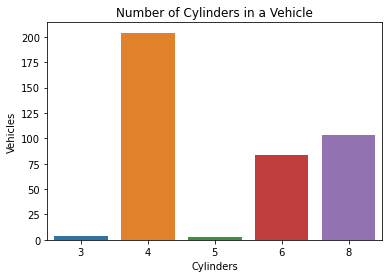

In [17]:
cylinders_per_vehicle = sns.barplot(x=cylinder_count.index, y=cylinder_count['Cylinders'], data=cylinder_count);
# The ax.set function in seaborn will rename the axes and the title of the barplot
cylinders_per_vehicle.set(xlabel='Cylinders',
                          ylabel='Vehicles',
                          title='Number of Cylinders in a Vehicle')
cylinders_per_vehicle

## Relationship Between Horsepower and Weight

<AxesSubplot:title={'center':'Relationship Between Cars Horsepower and Weight'}, xlabel='Horsepower', ylabel='Weight'>

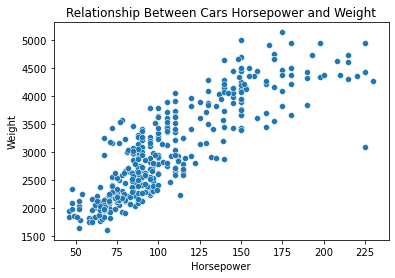

In [18]:
correlation = sns.scatterplot(x=automobile['Horsepower'], y=automobile['Weight']);
correlation.set(title="Relationship Between Cars Horsepower and Weight")
correlation

### Answer:

Based on the data shown, the vehicle with more horsepower generally weighs more.

## Asking a Question, then Answering It

### What is the distribution of the weights of the vehicles? 
- What is the average/mean of the weight? What is the minimum? What is the maximum?

In [19]:
weight = automobile['Weight'].agg(['min', 'max', 'mean'])
weight

min     1613.000000
max     5140.000000
mean    2970.424623
Name: Weight, dtype: float64

<AxesSubplot:title={'center':"Distibution of Vehicles' Weight"}, xlabel='Weight', ylabel='Number of Vehicles'>

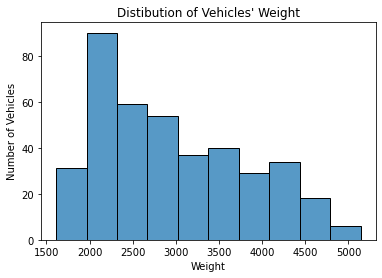

In [20]:
dist_weight = sns.histplot(automobile['Weight'])
dist_weight.set(ylabel = 'Number of Vehicles',
                title = "Distibution of Vehicles' Weight")
dist_weight

The average weight among the vehicles is 290.424623 lbs., with the minimum value being 1613 lbs and the maximum value being 5140 lbs.

Given that MPG (miles per gallon) is used in this dataset, with the data originating from an American university, it can be assumed all of the measurement units in the dataset utilize the imperial system.